In [40]:
import numpy as np
import cv2 as cv 
import matplotlib.pyplot as plt 

In [41]:
def conv2d(image, kernel, stride=1, padding=0):
    image_height, image_width = image.shape[:2]
    kernel_height, kernel_width = kernel.shape 

    output_height = (image_height-kernel_height)//stride + 1
    output_width = (image_width-kernel_width)//stride + 1

    output = np.zeros((output_height, output_width))

    for i in range(output_height):
        for j in range(output_width):
            region = image[i*stride:i*stride+kernel_height, j*stride:j*stride+kernel_width]
            output[i, j] = np.sum(region*kernel)

    return output 

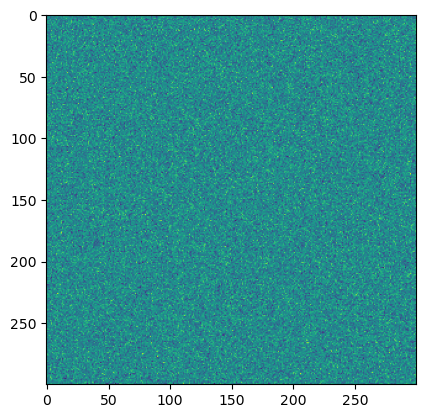

In [42]:
image_rand = np.random.randn(300,300)
plt.imshow(image_rand)

In [43]:
kernel = np.array([
    [1,0,-1],
    [1,0,-1],
    [1,0,-1]
])
kernel

array([[ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1]])

In [44]:
output = conv2d(image_rand, kernel)

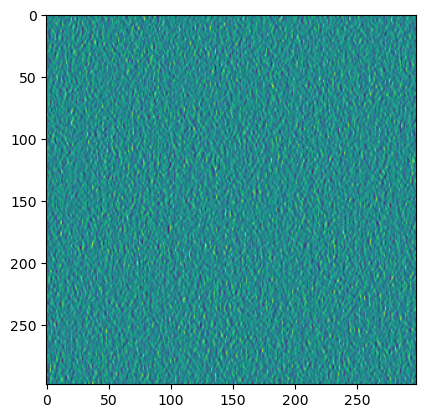

In [45]:
plt.imshow(output)

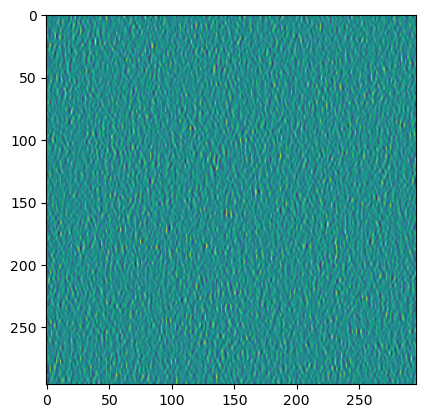

In [46]:
output2 = conv2d(output, kernel)
plt.imshow(output2)

In [47]:
img1 = cv.imread('img.jpg')
img2 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

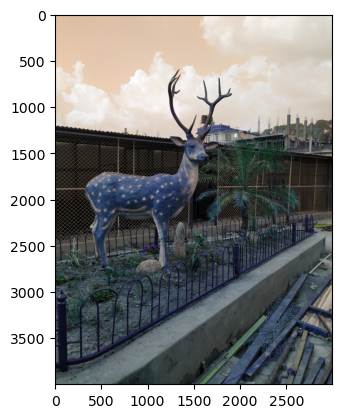

In [48]:
plt.imshow(img1)

In [49]:
img1.shape 

(4000, 3000, 3)

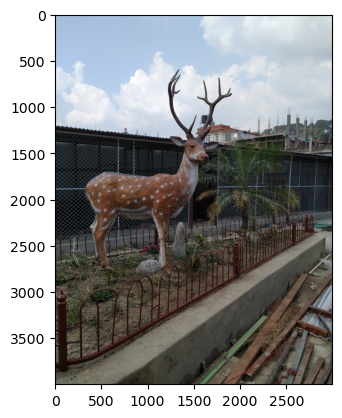

In [50]:
plt.imshow(img2)

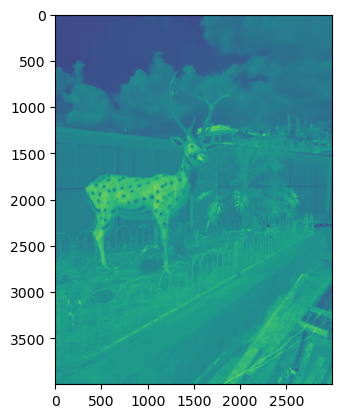

In [51]:
plt.imshow(conv2d(img2, kernel))

In [53]:
# Initialize a list to store the images
images = [img2]

# Apply the convolution 10 times, each time using the output as the input for the next convolution
for _ in range(10):
    new_image = conv2d(images[-1], kernel, stride=1, padding=1)
    images.append(new_image)

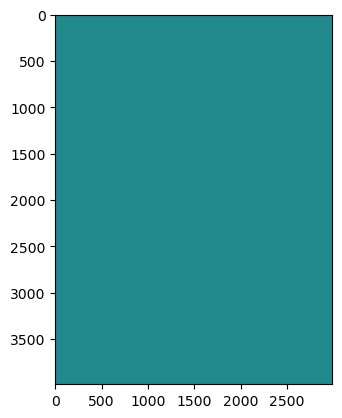

In [57]:
plt.imshow(images[5])

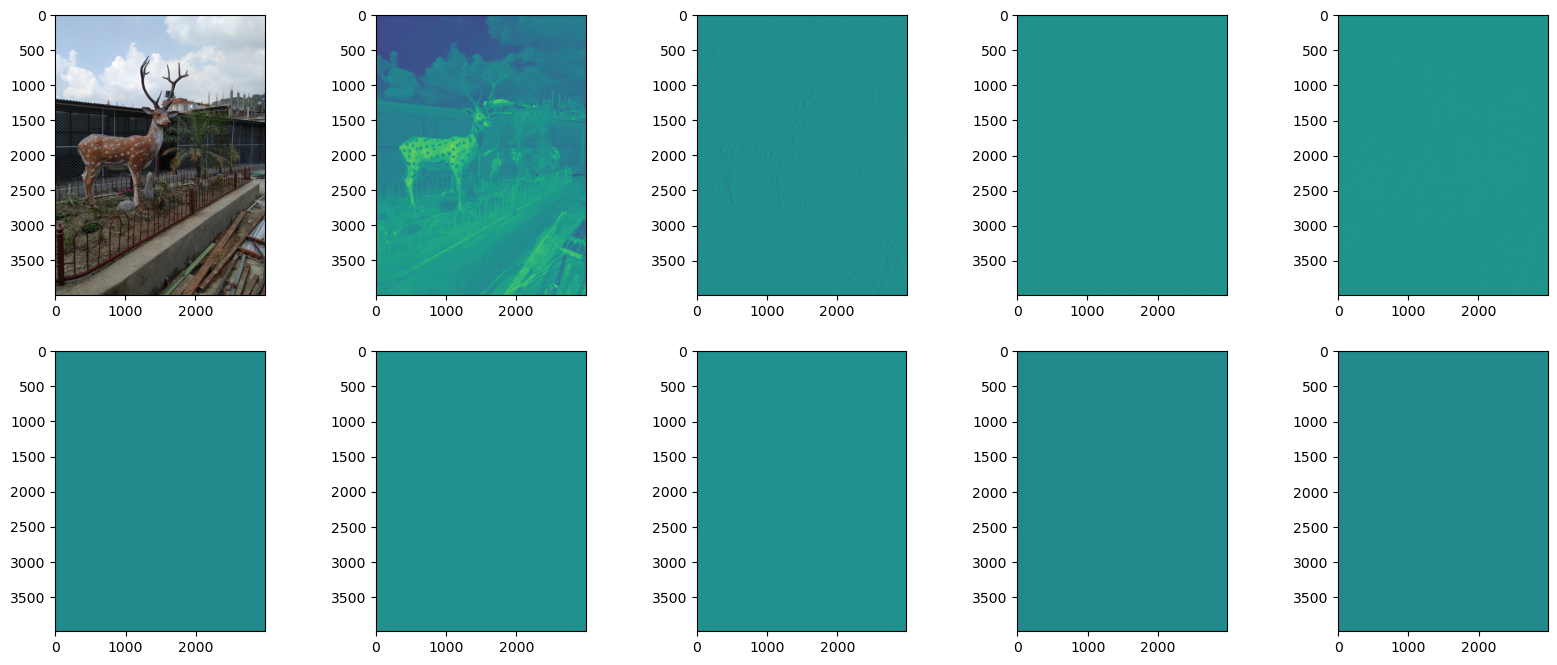

In [56]:
# Set up a plot with 2 rows and 5 columns to display the results
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axs = axes.flatten()
# Plot the initial image and the results of the convolutions
for img, ax in zip(images, axs):
    ax.imshow(img)

plt.show()